## Importing the boat's CAN BUS data


In [14]:
import vaex
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from pytz import timezone

import sys
sys.path.append('../../../')

from utils.plot import config_matplotlib, figsize, fig_save_and_show  # noqa: E402

config_matplotlib()
latex_img_path = '/home/joaoantoniocardoso/workspace_TCC/repo/tcc/imgs/'

input_path = "/home/joaoantoniocardoso/workspace_TCC/repo/code/data/final/"
input_filename = "unified_monotonic_data_1s.hdf5"
# input_filename = "unified_monotonic_data_100ms.hdf5"
df = vaex.open(input_path + input_filename).to_pandas_df()

# Localize the timestamp
tzinfo = timezone("America/Sao_Paulo")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp"] = df["timestamp"].dt.tz_localize(timezone("UTC"))
df["timestamp"] = df["timestamp"].dt.tz_convert(tzinfo)
df["timestamp"] = pd.DatetimeIndex(df["timestamp"]).tz_convert(None)
df.set_index('timestamp', inplace=True)
display(df)

[print(c) for c in sorted(df.columns)][0]


,MCC19_1__MEASUREMENTS__SIGNATURE,MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE,MCC19_1__MEASUREMENTS__INPUT_CURRENT,MCC19_1__MEASUREMENTS__INPUT_VOLTAGE,MCC19_1__MEASUREMENTS__DT,MCB19_2__MEASUREMENTS__SIGNATURE,MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE,MCB19_2__MEASUREMENTS__OUTPUT_CURRENT,MCB19_2__MEASUREMENTS__INPUT_VOLTAGE,MCB19_2__MEASUREMENTS__DT,...,solcast_PrecipitableWater,solcast_RelativeHumidity,solcast_SnowDepth,solcast_SurfacePressure,solcast_WindDirection10m,solcast_WindSpeed10m,solcast_Zenith,solcast_poa,solcast_energy,solcast_timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-29 14:56:53,225.0,39.37500,0.0,0.000000,0.199951,221.0,13.226562,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29 14:56:53
2020-01-29 14:56:54,225.0,39.37500,0.0,0.000000,0.199951,221.0,13.156250,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29 14:56:54
2020-01-29 14:56:55,225.0,39.40625,0.0,0.310059,0.709961,221.0,13.226562,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29 14:56:55
2020-01-29 14:56:56,225.0,39.40625,0.0,0.350098,0.589844,221.0,13.226562,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29 14:56:56
2020-01-29 14:56:57,225.0,39.37500,0.0,0.000000,0.219971,221.0,13.156250,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29 14:56:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02 16:25:25,225.0,38.09375,0.0,0.080017,0.819824,221.0,13.226562,0.0,0.0,0.0,...,52.6,83.7,0.0,1011.8,96.0,1.8,17.0,238.0,23918.818181,2020-02-02 16:25:25
2020-02-02 16:25:26,225.0,38.12500,0.0,0.080017,0.219971,221.0,13.156250,0.0,0.0,0.0,...,52.6,83.7,0.0,1011.8,96.0,1.8,17.0,238.0,23918.818181,2020-02-02 16:25:26
2020-02-02 16:25:27,225.0,38.12500,0.0,0.070007,0.409912,221.0,13.226562,0.0,0.0,0.0,...,52.6,83.7,0.0,1011.8,96.0,1.8,17.0,238.0,23918.818181,2020-02-02 16:25:27


MAB19__PUMPS__PUMPS
MAB19__PUMPS__SIGNATURE
MAB19__STATE__ERROR
MAB19__STATE__SIGNATURE
MAB19__STATE__STATE
MAM19__MOTOR__D
MAM19__MOTOR__I
MAM19__MOTOR__SIGNATURE
MAM19__STATE__ERROR
MAM19__STATE__SIGNATURE
MAM19__STATE__STATE
MCB19_1__MEASUREMENTS__DT
MCB19_1__MEASUREMENTS__INPUT_VOLTAGE
MCB19_1__MEASUREMENTS__OUTPUT_CURRENT
MCB19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_1__MEASUREMENTS__SIGNATURE
MCB19_1__STATE__CONTROL
MCB19_1__STATE__SIGNATURE
MCB19_1__STATE__STATE
MCB19_2__MEASUREMENTS__DT
MCB19_2__MEASUREMENTS__INPUT_VOLTAGE
MCB19_2__MEASUREMENTS__OUTPUT_CURRENT
MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_2__MEASUREMENTS__SIGNATURE
MCB19_2__STATE__CONTROL
MCB19_2__STATE__SIGNATURE
MCB19_2__STATE__STATE
MCC19_1__MEASUREMENTS__DT
MCC19_1__MEASUREMENTS__INPUT_CURRENT
MCC19_1__MEASUREMENTS__INPUT_VOLTAGE
MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_1__MEASUREMENTS__SIGNATURE
MCC19_1__STATE__CONTROL
MCC19_1__STATE__SIGNATURE
MCC19_1__STATE__STATE
MCC19_2__MEASUREMENTS__DT
MCC19_2__MEASUR

In [15]:
def zero_phase_lowpass_filter(dataframe, cutoff_freq, sampling_rate, order=5):
    """
    Applies a zero-phase lowpass filter to each column of a pandas DataFrame,
    handling NaN values by filtering only the continuous segments between NaNs.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        cutoff_freq (float): The cutoff frequency of the lowpass filter (in Hz).
        sampling_rate (float): The sampling rate of the data (in Hz).
        order (int): The order of the filter. Default is 5.

    Returns:
        pd.DataFrame: A new DataFrame with the filtered data.
    """
    from scipy.signal import butter, filtfilt

    # Design the Butterworth filter
    nyquist_freq = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    # Apply the filter to each column
    filtered_data = {}
    for column in dataframe.columns:
        # Extract the column data
        column_data = dataframe[column].copy()

        # Find segments of continuous data (between NaNs)
        nan_indices = np.where(column_data.isna())[0]
        segments = []
        start = 0
        for i in nan_indices:
            if start < i:
                segments.append(column_data[start:i])
            start = i + 1
        if start < len(column_data):
            segments.append(column_data[start:])

        # Filter each segment individually
        filtered_segments = []
        for segment in segments:
            if not segment.isna().all():  # Skip segments that are all NaNs
                filtered_segment = filtfilt(b, a, segment.dropna())
                filtered_segments.append(pd.Series(filtered_segment, index=segment.dropna().index))
            else:
                filtered_segments.append(segment)  # Keep NaNs as is

        # Combine the filtered segments back into a single Series
        filtered_data[column] = pd.concat(filtered_segments).sort_index()

    # Return a new DataFrame with the filtered data
    return pd.DataFrame(filtered_data, index=dataframe.index)

## Transforming the boat's CAN data into boat's circuit data


### Selecting the data of interest


In [16]:
ignored = [
    "MIN",
    "MAX",
    "STATE",
    "ERROR",
    "SIGNATURE",
    # "MCS19",
    "MAB19",
    "PUMPS",
    "solcast",
]

columns = [tuple(c.split("__")) for c in sorted(df.columns) if all(x not in c for x in ignored)]
columns

[('MAM19', 'MOTOR', 'D'),
 ('MAM19', 'MOTOR', 'I'),
 ('MCB19_1', 'MEASUREMENTS', 'DT'),
 ('MCB19_1', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCB19_1', 'MEASUREMENTS', 'OUTPUT_CURRENT'),
 ('MCB19_1', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCB19_2', 'MEASUREMENTS', 'DT'),
 ('MCB19_2', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCB19_2', 'MEASUREMENTS', 'OUTPUT_CURRENT'),
 ('MCB19_2', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_1', 'MEASUREMENTS', 'DT'),
 ('MCC19_1', 'MEASUREMENTS', 'INPUT_CURRENT'),
 ('MCC19_1', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCC19_1', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_2', 'MEASUREMENTS', 'DT'),
 ('MCC19_2', 'MEASUREMENTS', 'INPUT_CURRENT'),
 ('MCC19_2', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCC19_2', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_3', 'MEASUREMENTS', 'DT'),
 ('MCC19_3', 'MEASUREMENTS', 'INPUT_CURRENT'),
 ('MCC19_3', 'MEASUREMENTS', 'INPUT_VOLTAGE'),
 ('MCC19_3', 'MEASUREMENTS', 'OUTPUT_VOLTAGE'),
 ('MCC19_4', 'MEASUREMENTS', 'DT'),
 ('MCC19_4', 'MEASUR

In [17]:
def col(module: str, topic: str, byte: str) -> str:
    separator = "__"
    return separator.join([module, topic, byte])


# Module name to system variable name mapper
number_of_mppts = 4
number_of_battery_cells = 3
number_of_mcbs = 2
system_data = {
    "Battery Pack Voltage (MCS)": col("MCS19", "BAT", "AVG"),
    "Battery Pack Voltage (MCB)": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE") for i in range(number_of_mcbs)
    ],
    "Battery Pack Voltage (MCC)": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE") for i in range(number_of_battery_cells)
    ],
    "Battery Cell Voltage (MSC)": [
        col(f"MSC19_{i + 1}", "ADC", "AVG") for i in range(number_of_battery_cells)
    ],
    "Battery Input Current": col("MSC19_4", "ADC", "AVG"),
    "Battery Output Current": col("MSC19_5", "ADC", "AVG"),
    "ESC Duty Cycle (MSWI)": col("MSWI19", "MOTOR", "D"),
    "ESC Motor On (MSWI)": col("MSWI19", "MOTOR", "MOTOR"),
    "ESC Boat On (MSWI)": col("MSWI19", "MCS", "BOAT_ON"),
    "ESC Duty Cycle (MIC)": col("MIC19", "MOTOR", "D"),
    "ESC Motor On (MIC)": col("MIC19", "MOTOR", "MOTOR"),
    "ESC Boat On (MIC)": col("MIC19", "MCS", "BOAT_ON"),
    "Motor Angular Speed": col("MT19", "RPM", "AVG"),
    "MPPT Input Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Output Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Input Current": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_CURRENT")
        for i in range(number_of_mppts)
    ],
    "MPPT Duty Cycle": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mppts)
    ],
    "MCB Input Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Current": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in range(number_of_mcbs)
    ],
    "MCB Duty Cycle": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mcbs)
    ],
}
system_data


{'Battery Pack Voltage (MCS)': 'MCS19__BAT__AVG',
 'Battery Pack Voltage (MCB)': ['MCB19_1__MEASUREMENTS__INPUT_VOLTAGE',
  'MCB19_2__MEASUREMENTS__INPUT_VOLTAGE'],
 'Battery Pack Voltage (MCC)': ['MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE'],
 'Battery Cell Voltage (MSC)': ['MSC19_1__ADC__AVG',
  'MSC19_2__ADC__AVG',
  'MSC19_3__ADC__AVG'],
 'Battery Input Current': 'MSC19_4__ADC__AVG',
 'Battery Output Current': 'MSC19_5__ADC__AVG',
 'ESC Duty Cycle (MSWI)': 'MSWI19__MOTOR__D',
 'ESC Motor On (MSWI)': 'MSWI19__MOTOR__MOTOR',
 'ESC Boat On (MSWI)': 'MSWI19__MCS__BOAT_ON',
 'ESC Duty Cycle (MIC)': 'MIC19__MOTOR__D',
 'ESC Motor On (MIC)': 'MIC19__MOTOR__MOTOR',
 'ESC Boat On (MIC)': 'MIC19__MCS__BOAT_ON',
 'Motor Angular Speed': 'MT19__RPM__AVG',
 'MPPT Input Voltage': ['MCC19_1__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_4__ME

In [25]:
# Fix data types
for col in system_data:
    df[system_data[col]] = df[system_data[col]].astype(np.float64)

In [26]:
# Just to easy our visualization
start1 = pd.Timestamp(year=2020, month=1, day=31, hour=10, minute=30, second=0, tzinfo=tzinfo).tz_convert(None)
end1 = pd.Timestamp(year=2020, month=1, day=31, hour=17, minute=30, second=0, tzinfo=tzinfo).tz_convert(None)
region1 = (df.index >= start1) & (df.index <= end1)

start2 = pd.Timestamp(year=2020, month=1, day=31, hour=11, minute=20, second=0, tzinfo=tzinfo).tz_convert(None)
end2 = pd.Timestamp(year=2020, month=1, day=31, hour=13, minute=30, second=0, tzinfo=tzinfo).tz_convert(None)
region2 = (df.index >= start2) & (df.index <= end2)

In [27]:
def check_bit(data, bit):
    x = data.fillna(0).to_numpy().round().astype(np.uint8)
    return ((x) & (1 << bit))

boat_on_bit = 0
motor_on_bit = 0
dms_on_bit = 1

# ESC uses The Duty Cycle from MSWI by default, and fallbacks to MIC when MSWI is not present:
df['ESC Duty Cycle (MIC+MSWI)'] = df[system_data['ESC Duty Cycle (MSWI)']].fillna(df[system_data['ESC Duty Cycle (MIC)']])
df['ESC Duty Cycle (MAM)'] = df['ESC Duty Cycle (MIC+MSWI)'] * df[system_data['ESC Motor On (MIC)']]

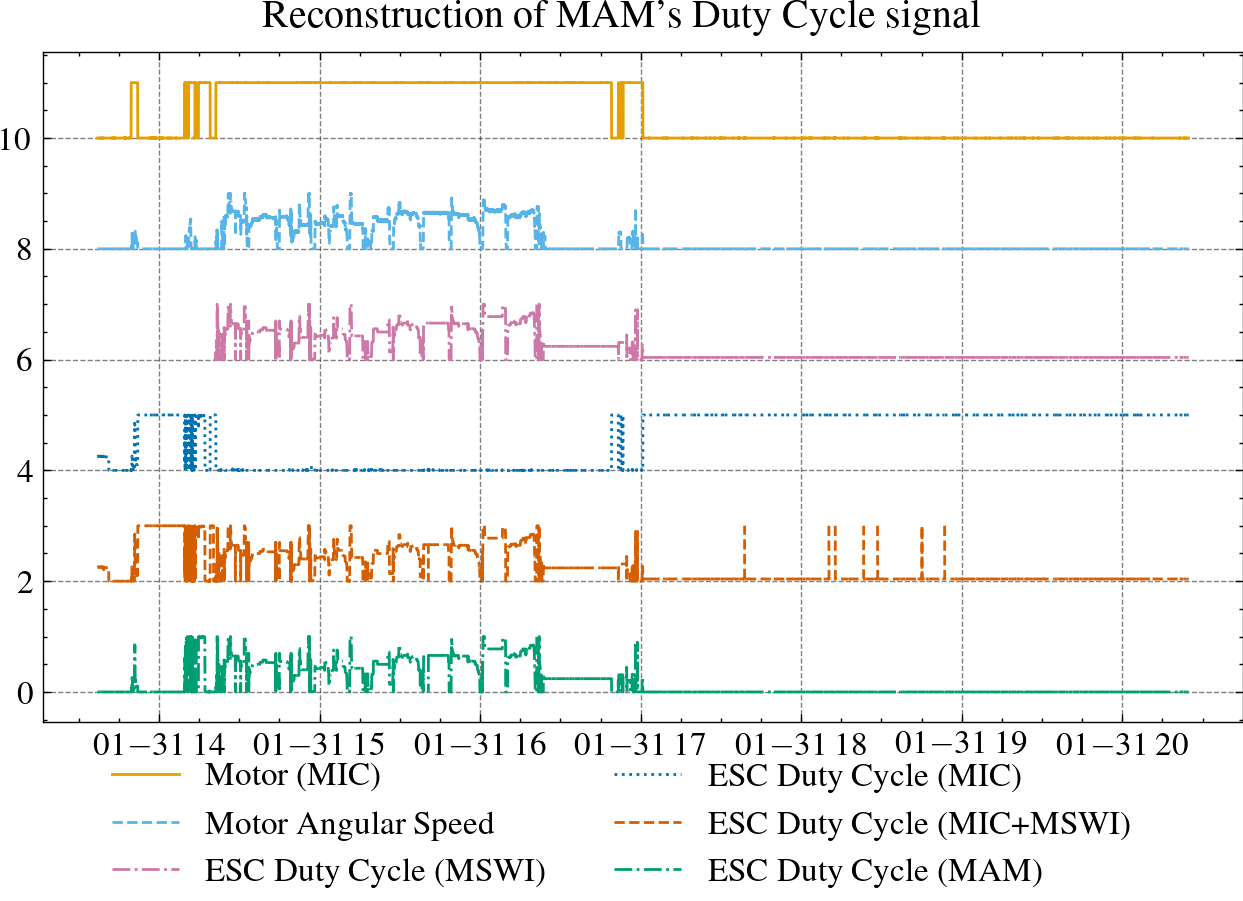

In [28]:
# From the Motor Angular Speed signal, we can observe that even after combining both Duty Cycles, there are still parts
# where the motor doesn't spin when the duty-cycle is above zero. We can just multiply both signals to get the actual
# Duty Cycle applied by MAM.

df_local = df.loc[region1]
fig = plt.figure()
title_en = 'Reconstruction of MAM\'s Duty Cycle signal'
title_ptg = 'Reconstrução do sianl do Duty Cycle do MAM'
filename = f'{latex_img_path}/dataset_duty_cycle_fix.pdf'
plt.plot(df_local.index, 10+df_local[system_data['ESC Motor On (MIC)']], label='Motor (MIC)')
plt.plot(df_local.index, 8+df_local[system_data['Motor Angular Speed']]/df_local[system_data['Motor Angular Speed']].max(), label='Motor Angular Speed')
plt.plot(df_local.index, 6+df_local[system_data['ESC Duty Cycle (MSWI)']]/df_local[system_data['ESC Duty Cycle (MSWI)']].max(), label='ESC Duty Cycle (MSWI)')
plt.plot(df_local.index, 4+df_local[system_data['ESC Duty Cycle (MIC)']]/df_local[system_data['ESC Duty Cycle (MIC)']].max(), label='ESC Duty Cycle (MIC)')
plt.plot(df_local.index, 2+df_local['ESC Duty Cycle (MIC+MSWI)'], label='ESC Duty Cycle (MIC+MSWI)')
plt.plot(df_local.index, df_local['ESC Duty Cycle (MAM)'], label='ESC Duty Cycle (MAM)')
fig_save_and_show(filename, title_ptg, title_en, ncol=2)

df['esc_D'] = df['ESC Duty Cycle (MAM)']
df['motor_w'] = df[system_data['Motor Angular Speed']]

In [29]:
# MCS Voltage scale fix
a = df[system_data['Battery Cell Voltage (MSC)']].sum(axis=1, min_count=1).mean()
b = df[system_data['Battery Pack Voltage (MCS)']].mean()
MCS_k = a/b
print(f'MCS signal scaled by {MCS_k}')
df[system_data['Battery Pack Voltage (MCS)']] *= MCS_k

MCS signal scaled by 0.07526868989035129


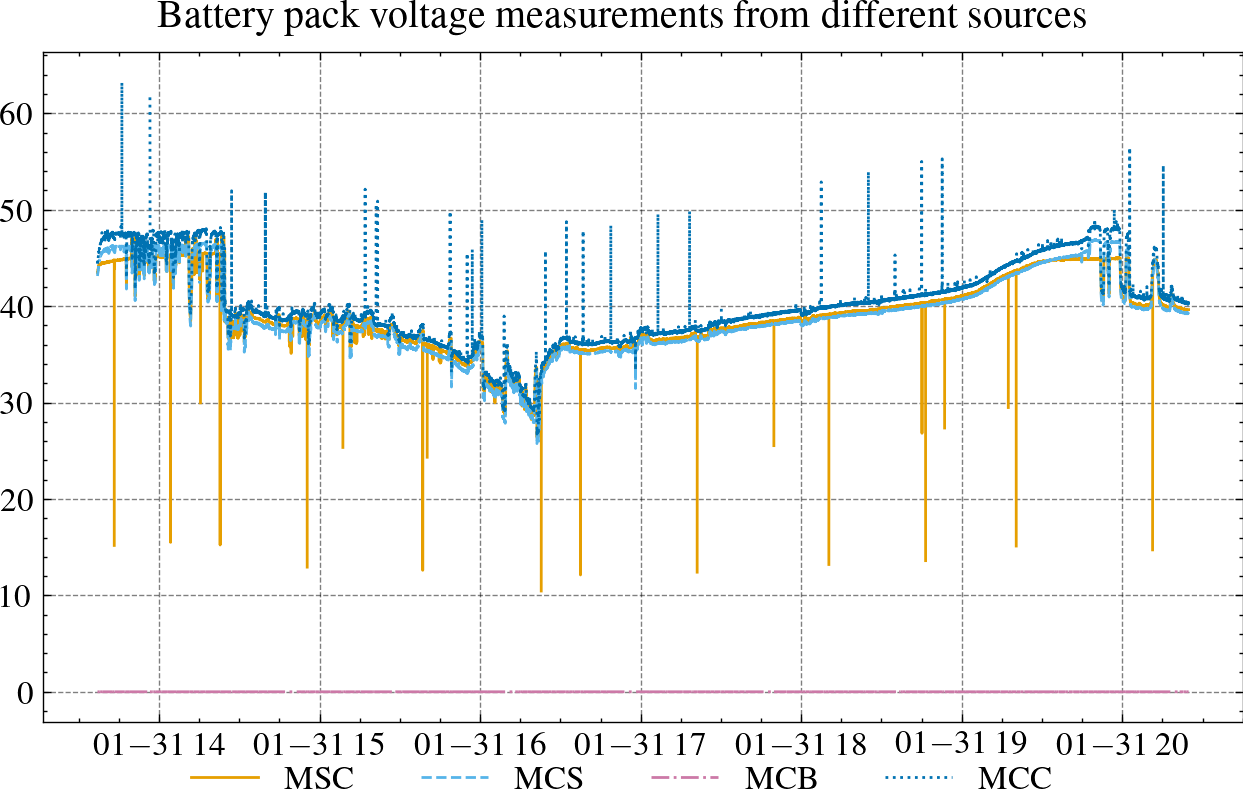

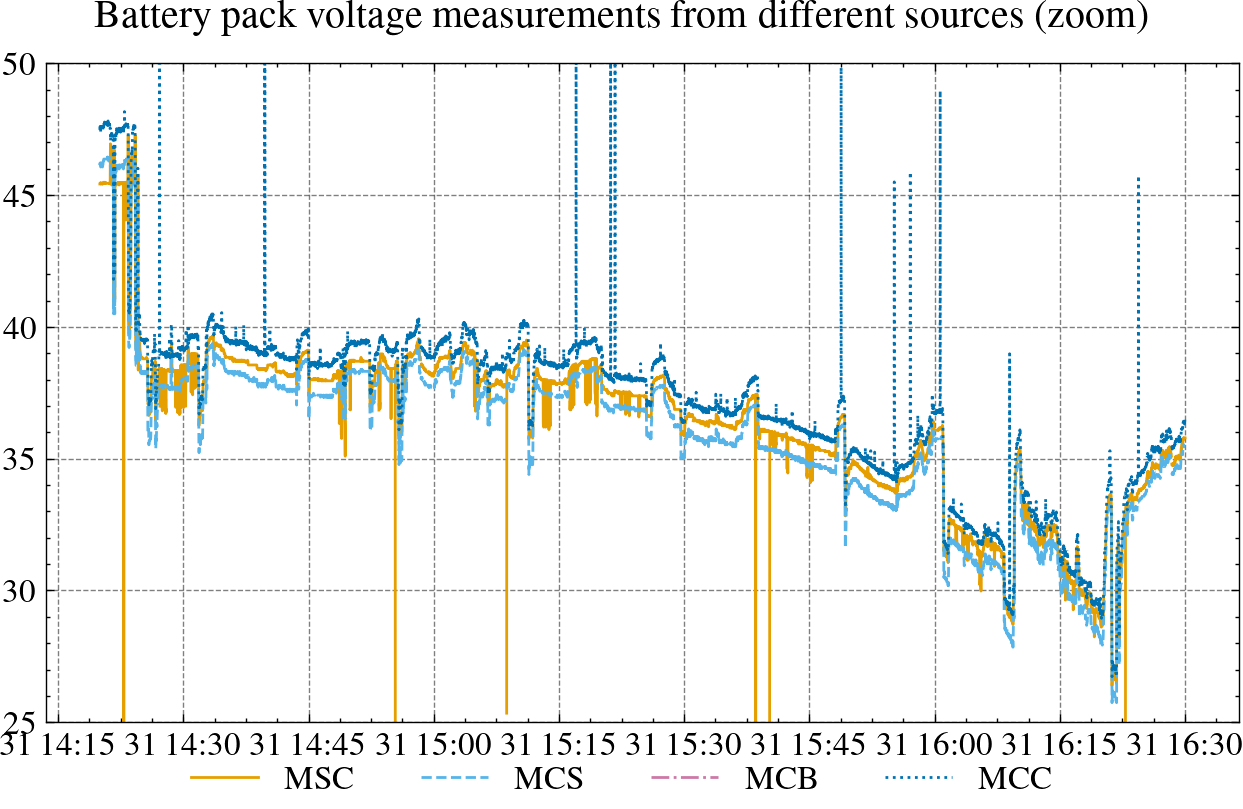

In [30]:
# Showing battery voltage
df_local = df.loc[region1]
fig = plt.figure()
title_en = 'Battery pack voltage measurements from different sources'
title_ptg = 'Medições da tensão do banco de baterias de diferentes fontes'
filename = f'{latex_img_path}/dataset_battery_voltage_from_different_sources.pdf'
plt.plot(df_local.index, df_local[system_data['Battery Cell Voltage (MSC)']].sum(axis=1, min_count=1), label='MSC')
plt.plot(df_local.index, df_local[system_data['Battery Pack Voltage (MCS)']], label='MCS')
plt.plot(df_local.index, df_local[system_data['Battery Pack Voltage (MCB)']].mean(axis=1), label='MCB')
plt.plot(df_local.index, df_local[system_data['Battery Pack Voltage (MCC)']].mean(axis=1), label='MCC')
fig_save_and_show(filename, title_ptg, title_en, ncol=4)

df_local = df.loc[region2]
fig = plt.figure()
title_en = 'Battery pack voltage measurements from different sources (zoom)'
title_ptg = 'Medições da tensão do banco de baterias de diferentes fontes (zoom)'
filename = f'{latex_img_path}/dataset_battery_voltage_from_different_sources_zoom.pdf'
plt.plot(df_local.index, df_local[system_data['Battery Cell Voltage (MSC)']].sum(axis=1, min_count=1), label='MSC')
plt.plot(df_local.index, df_local[system_data['Battery Pack Voltage (MCS)']], label='MCS')
plt.plot(df_local.index, df_local[system_data['Battery Pack Voltage (MCB)']].mean(axis=1), label='MCB')
plt.plot(df_local.index, df_local[system_data['Battery Pack Voltage (MCC)']].mean(axis=1), label='MCC')
plt.ylim([25, 50])
fig_save_and_show(filename, title_ptg, title_en, ncol=4)

df['batt_v'] = df[system_data['Battery Pack Voltage (MCS)']]

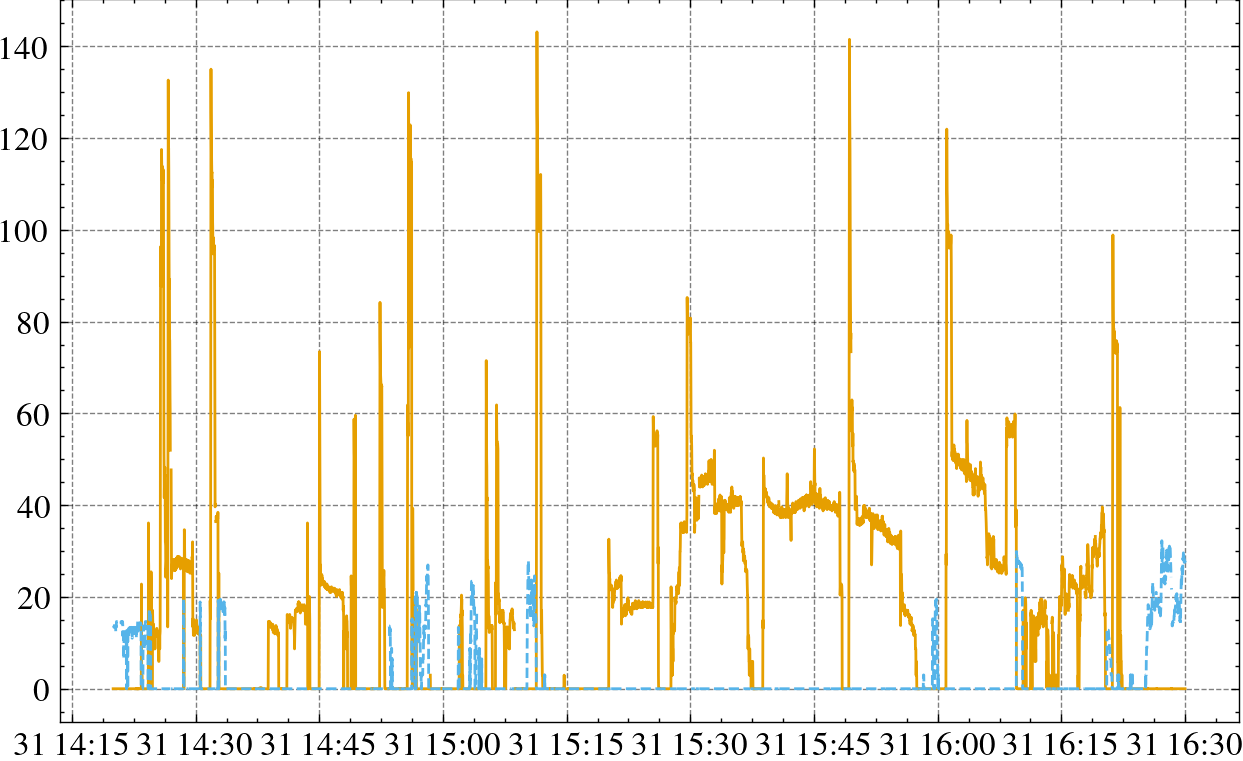

In [31]:
plt.plot(df_local.index, df_local[system_data['Battery Output Current']], label='Battery Output Current')
plt.plot(df_local.index, df_local[system_data['Battery Input Current']], label='Battery Input Current')

df["batt_i_out"] = df[system_data["Battery Output Current"]]
df['batt_i_in'] = df[system_data["Battery Input Current"]]
df['batt_i'] = df['batt_i_out'] - df['batt_i_in']

In [32]:
# MPPTs and PV data
pv_eta = 0.1589
pv_S = 1.650 * 0.992
mppt_eta = 0.9259

df['mppts_io_hat'] = 0
for i in range(len(system_data["MPPT Output Voltage"])):
    df[f"mppt{i + 1}_v_in"] = df[system_data["MPPT Input Voltage"][i]]
    df[f"mppt{i + 1}_v_out"] = df[system_data["MPPT Output Voltage"][i]]
    df[f"mppt{i + 1}_i_in"] = (
        df[system_data["MPPT Input Current"][i]] * 0.1
    )  # Fix wrong scale
    df[f"mppt{i + 1}_dt"] = df[system_data["MPPT Duty Cycle"][i]]

    df[f"mppt{i + 1}_p_in"] = df[f"mppt{i + 1}_i_in"] * df[f"mppt{i + 1}_v_in"]

    df[f"mppt{i + 1}_po_hat"] = df[f"mppt{i + 1}_p_in"] * mppt_eta
    df[f"mppt{i + 1}_io_hat"] = df[f"mppt{i + 1}_po_hat"] / df['batt_v']

    df[f"pv{i + 1}_pi_hat"] = df[f"mppt{i + 1}_p_in"] / pv_eta
    df[f"pv{i + 1}_G_hat"] = df[f"pv{i + 1}_pi_hat"] / pv_S

    df['mppts_io_hat'] += df[f"mppt{i + 1}_io_hat"]

/tmp/ipykernel_97928/3914838874.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"pv{i + 1}_pi_hat"] = df[f"mppt{i + 1}_p_in"] / pv_eta
/tmp/ipykernel_97928/3914838874.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"pv{i + 1}_G_hat"] = df[f"pv{i + 1}_pi_hat"] / pv_S


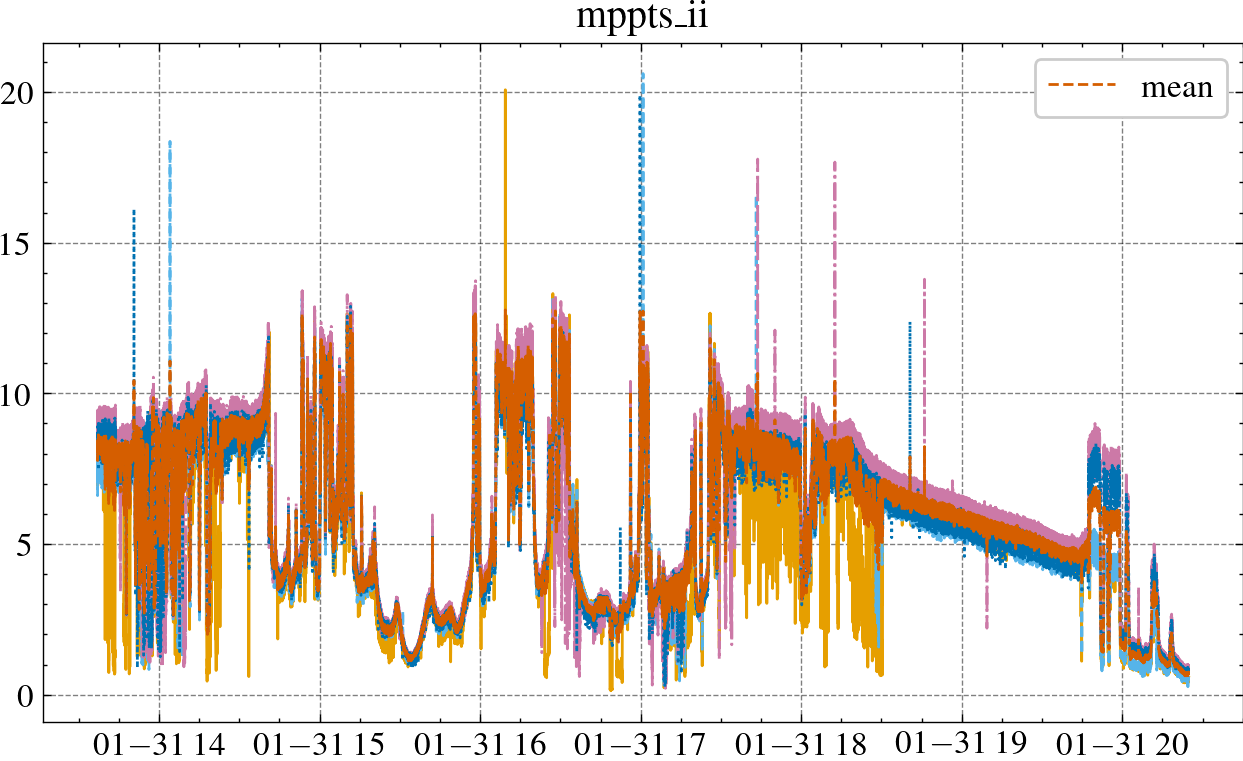

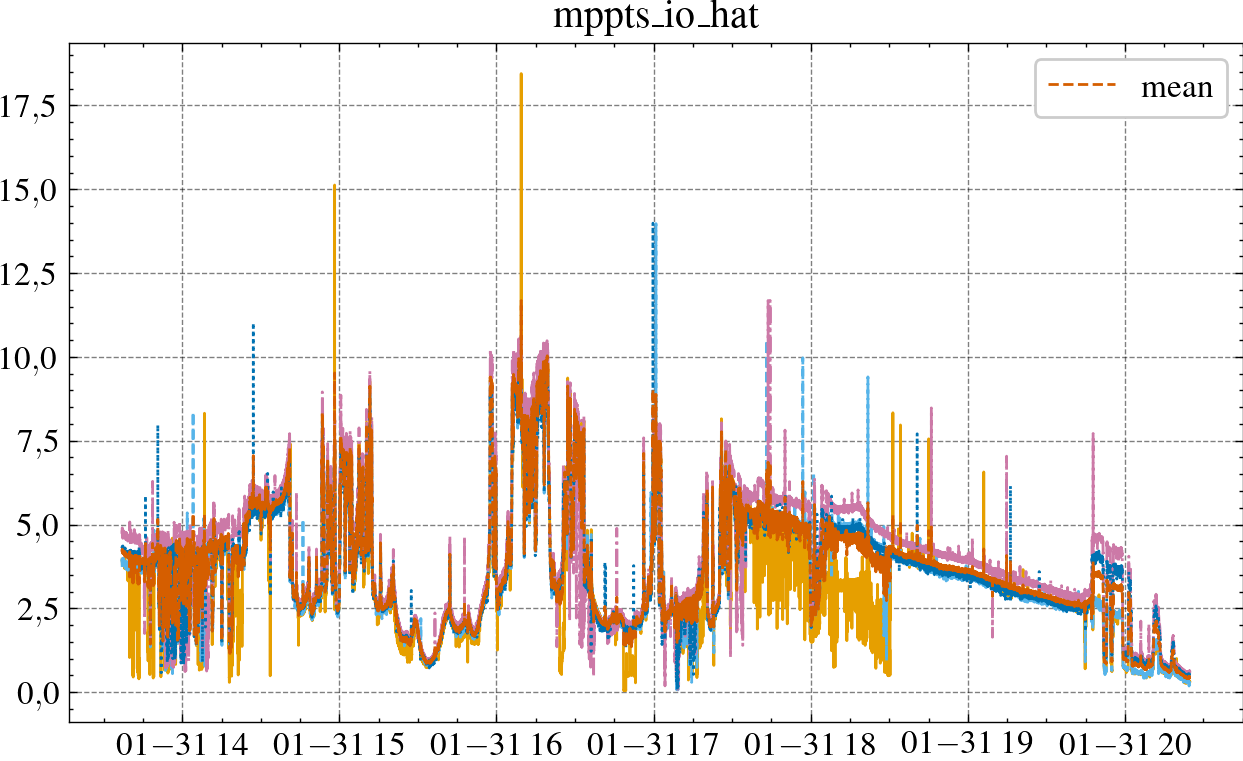

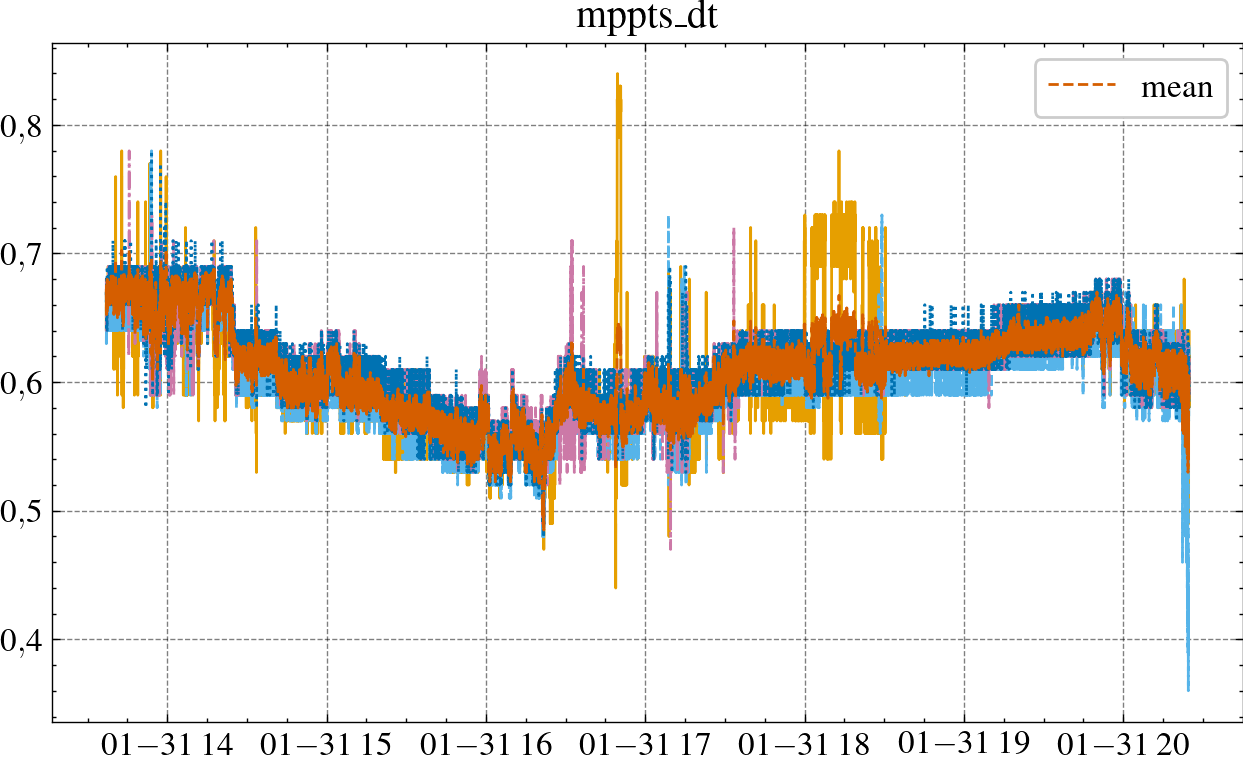

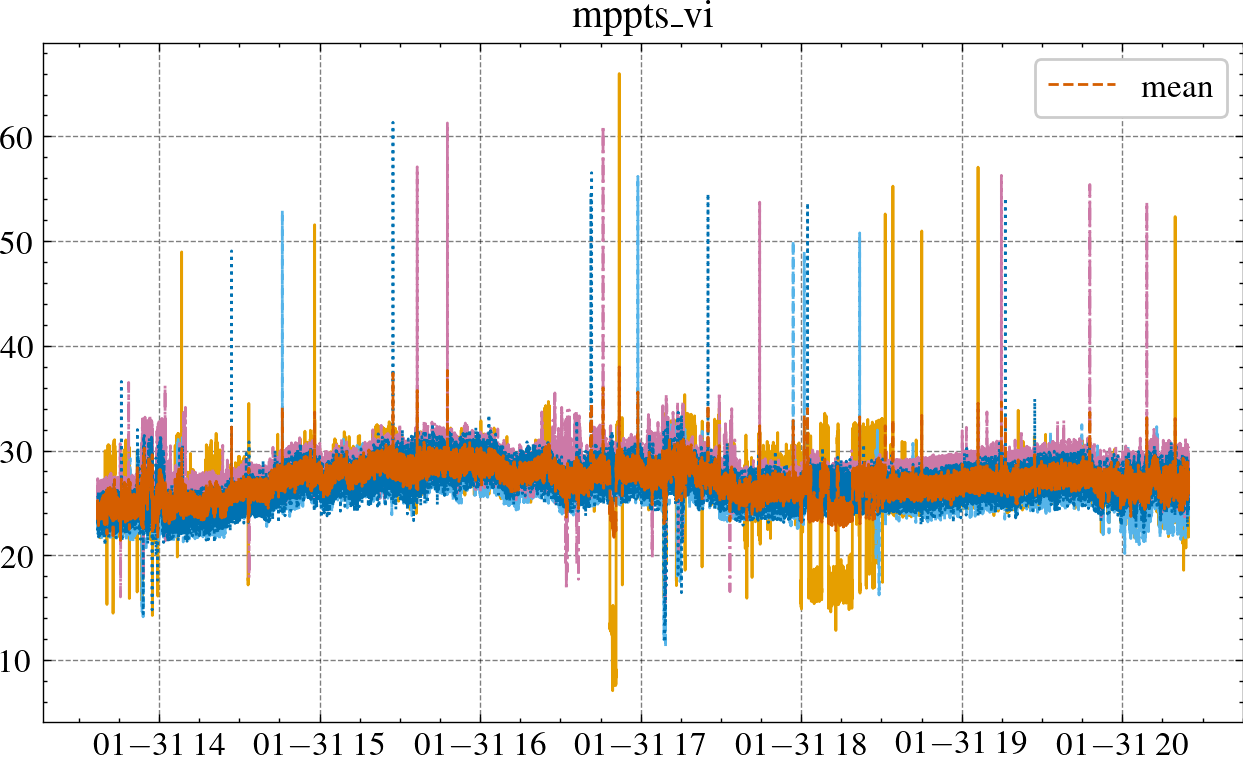

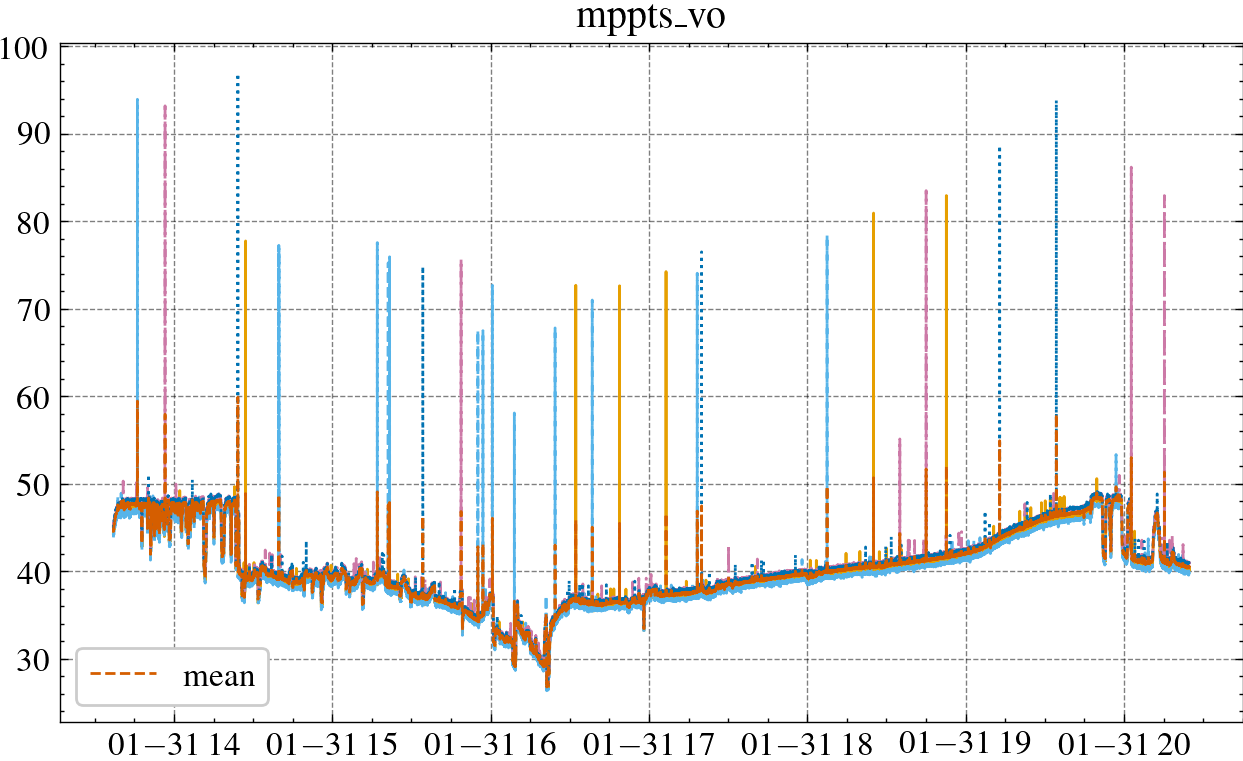

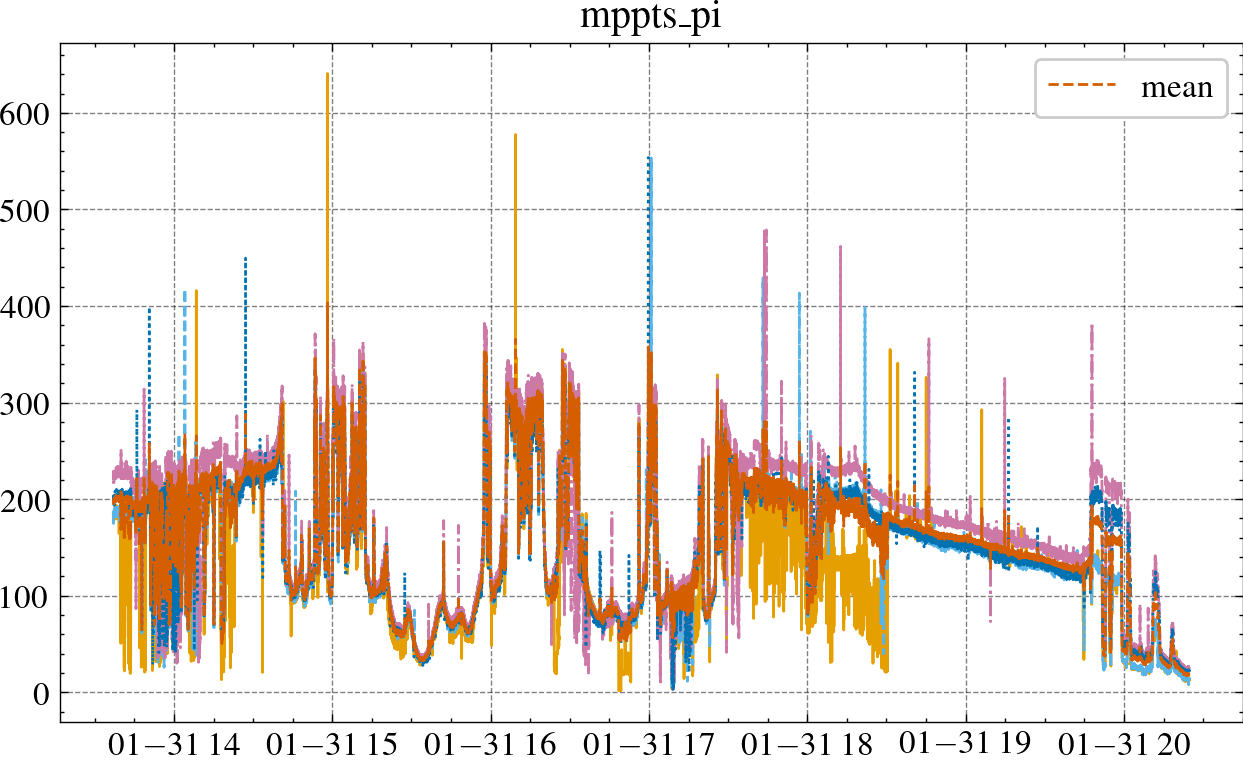

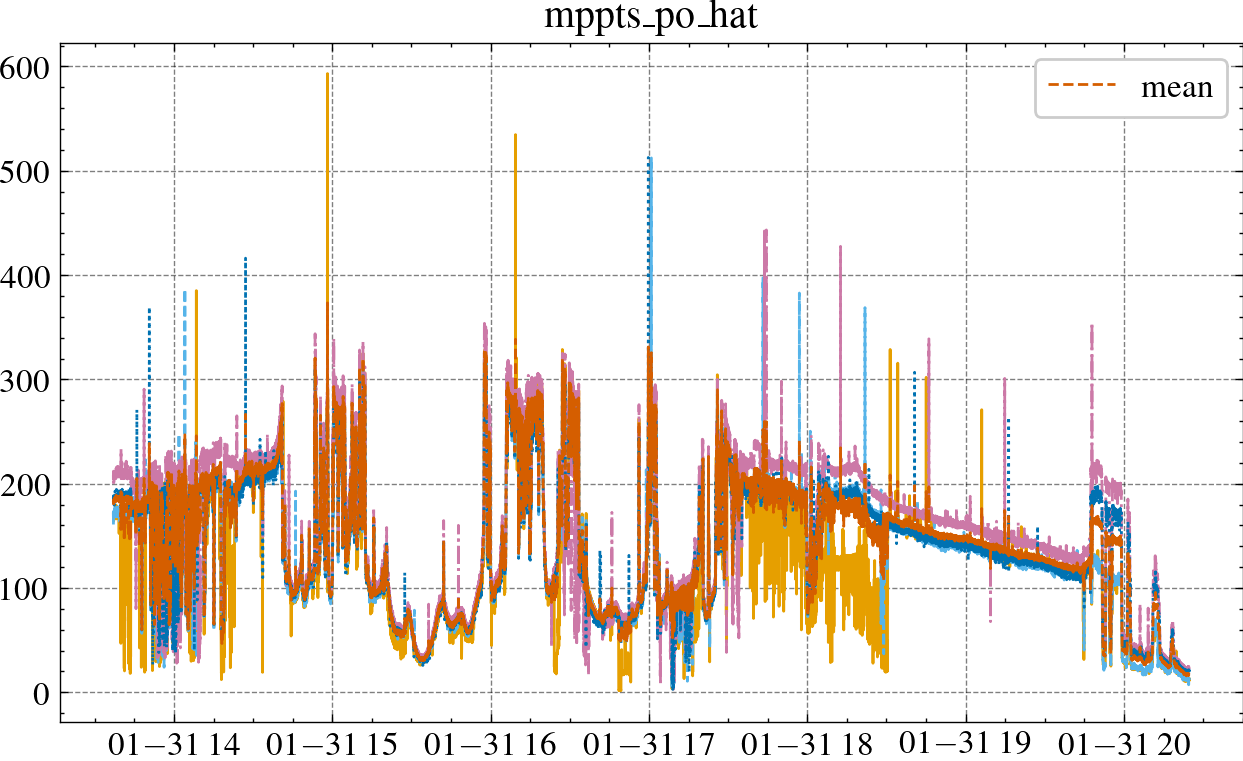

In [34]:
df_local = df.loc[region1]
variables = ['ii', 'io_hat', 'dt', 'vi', 'vo', 'pi', 'po_hat']
cols = [f'mppt{i+1}_{v}' for i in range(number_of_mppts) for v in variables]
df_local = df_local[cols].interpolate(method='time', limit=1000, limit_area='inside')
# df_local = zero_phase_lowpass_filter(df_local, cutoff_freq=1/10, sampling_rate=1, order=5)

for var in variables:
    plt.figure()
    plt.plot(df_local.index, df_local[[f'mppt{i+1}_{var}' for i in range(number_of_mppts)]])
    plt.plot(df_local.index, df_local[[f'mppt{i+1}_{var}' for i in range(number_of_mppts)]].mean(axis=1), label='mean')
    plt.legend()
    plt.title(f'mppts_{var}')
    plt.show()

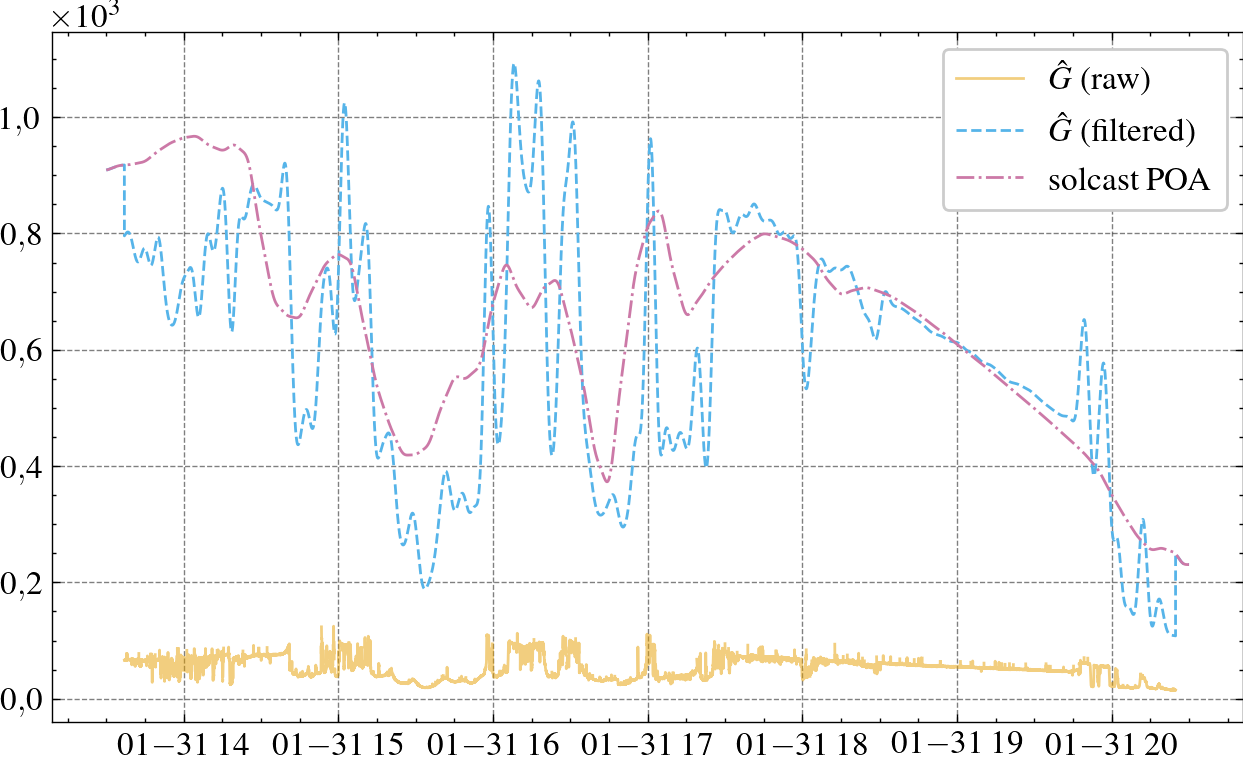

In [35]:
df_local = df.loc[region1]
plt.plot(df_local.index, df_local[cols].mean(axis=1), label='$\hat{G}$ (raw)', alpha=0.5)

variables = ['G_hat']
cols = [f'pv{i+1}_{v}' for i in range(number_of_mppts) for v in variables]
cols.append('solcast_poa')
df_local = df_local[cols].interpolate(method='time', limit=1000, limit_area='inside')
df_local = zero_phase_lowpass_filter(df_local, cutoff_freq=1/(5*60), sampling_rate=1, order=5)

plt.plot(df_local.index, df_local[cols].mean(axis=1), label='$\hat{G}$ (filtered)')
plt.plot(df_local.index, df_local['solcast_poa'], label='solcast POA')
plt.legend()
plt.show()

/tmp/ipykernel_97928/1521715551.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['oth_ii_hat'] = oth_pi / df['batt_v']
/tmp/ipykernel_97928/1521715551.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['esc_i_in_hat'] = df['batt_i'] - df['oth_ii_hat'] + df['mppts_io_hat']


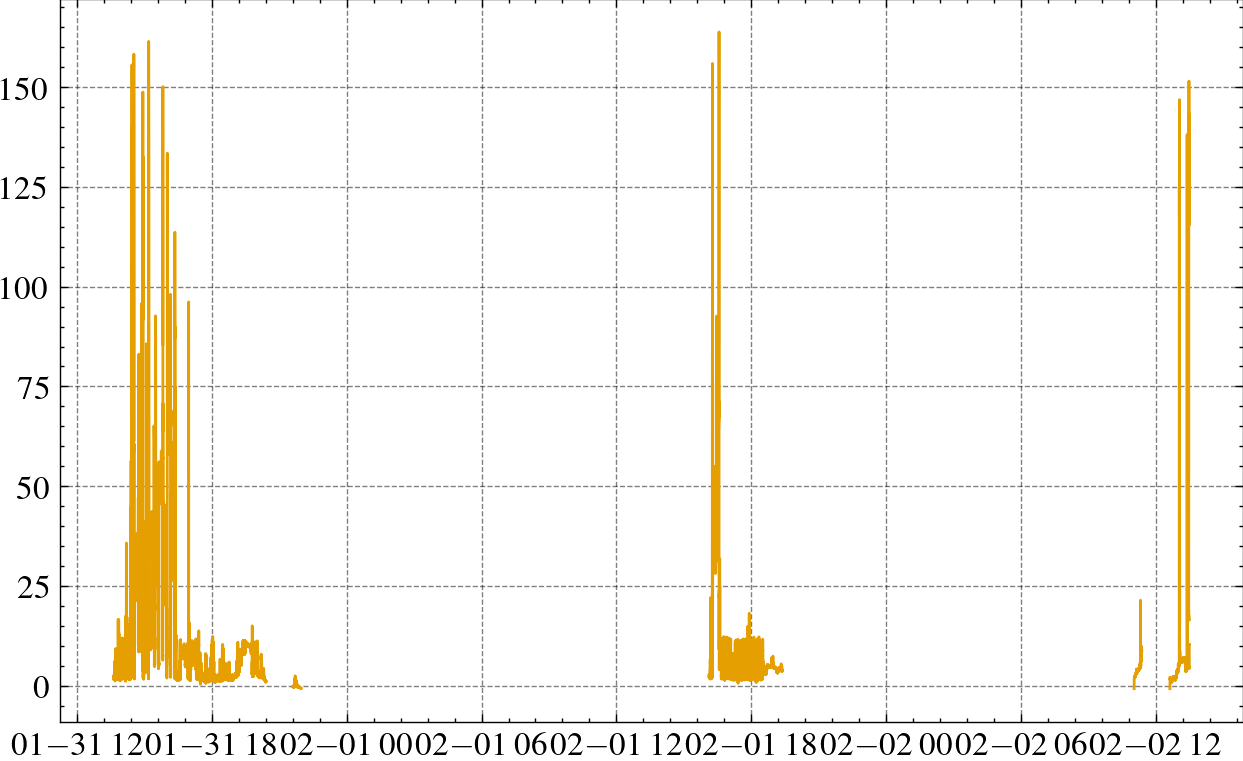

In [36]:
oth_pi = 27
df['oth_ii_hat'] = oth_pi / df['batt_v']
# From the node analysis, compute currents and powers
df['esc_i_in_hat'] = df['batt_i'] - df['oth_ii_hat'] + df['mppts_io_hat']

df_local = df#.loc[region1]
plt.plot(df_local.index, df_local['esc_i_in_hat'])
plt.show()

In [37]:
[print(c) for c in df.columns];

MCC19_1__MEASUREMENTS__SIGNATURE
MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_1__MEASUREMENTS__INPUT_CURRENT
MCC19_1__MEASUREMENTS__INPUT_VOLTAGE
MCC19_1__MEASUREMENTS__DT
MCB19_2__MEASUREMENTS__SIGNATURE
MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_2__MEASUREMENTS__OUTPUT_CURRENT
MCB19_2__MEASUREMENTS__INPUT_VOLTAGE
MCB19_2__MEASUREMENTS__DT
MCC19_3__MEASUREMENTS__SIGNATURE
MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_3__MEASUREMENTS__INPUT_CURRENT
MCC19_3__MEASUREMENTS__INPUT_VOLTAGE
MCC19_3__MEASUREMENTS__DT
MIC19__MOTOR__SIGNATURE
MIC19__MOTOR__MOTOR
MIC19__MOTOR__D
MIC19__MOTOR__I
MIC19__MCS__SIGNATURE
MIC19__MCS__BOAT_ON
MIC19__PUMPS__SIGNATURE
MIC19__PUMPS__PUMPS
MCC19_4__MEASUREMENTS__SIGNATURE
MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_4__MEASUREMENTS__INPUT_CURRENT
MCC19_4__MEASUREMENTS__INPUT_VOLTAGE
MCC19_4__MEASUREMENTS__DT
MSWI19__MCS__SIGNATURE
MSWI19__MCS__BOAT_ON
MSC19_3__ADC__SIGNATURE
MSC19_3__ADC__AVG
MSC19_3__ADC__MIN
MSC19_3__ADC__MAX
MIC19__STATE__SIGNATURE
MIC19__

## Remove raw data columns


In [38]:
cols_to_keep = [
    'solcast_AirTemp',
    'solcast_albedo',
    'solcast_Azimuth',
    'solcast_CloudOpacity',
    'solcast_DewpointTemp',
    'solcast_dhi',
    'solcast_dni',
    'solcast_Ebh',
    'solcast_ghi',
    'solcast_GtiFixedTilt',
    'solcast_GtiTracking',
    'solcast_PrecipitableWater',
    'solcast_RelativeHumidity',
    'solcast_SnowDepth',
    'solcast_SurfacePressure',
    'solcast_WindDirection10m',
    'solcast_WindSpeed10m',
    'solcast_Zenith',
    'solcast_poa',
    'solcast_energy',
    'solcast_timestamp',
    'esc_D',
    'motor_w',
    'batt_v',
    'batt_i_out',
    'batt_i_in',
    'batt_i',
    'mppts_io_hat',
    'mppt1_vi',
    'mppt1_vo',
    'mppt1_ii',
    'mppt1_dt',
    'mppt1_pi',
    'mppt1_po_hat',
    'mppt1_io_hat',
    'pv1_pi_hat',
    'pv1_G_hat',
    'mppt2_vi',
    'mppt2_vo',
    'mppt2_ii',
    'mppt2_dt',
    'mppt2_pi',
    'mppt2_po_hat',
    'mppt2_io_hat',
    'pv2_pi_hat',
    'pv2_G_hat',
    'mppt3_vi',
    'mppt3_vo',
    'mppt3_ii',
    'mppt3_dt',
    'mppt3_pi',
    'mppt3_po_hat',
    'mppt3_io_hat',
    'pv3_pi_hat',
    'pv3_G_hat',
    'mppt4_vi',
    'mppt4_vo',
    'mppt4_ii',
    'mppt4_dt',
    'mppt4_pi',
    'mppt4_po_hat',
    'mppt4_io_hat',
    'pv4_pi_hat',
    'pv4_G_hat',
    'oth_ii_hat',
    'esc_i_in_hat',
]
df = df[cols_to_keep]

df.to_csv("models/2020/boat_data_1s.csv")
# df.to_csv("models/2020/boat_data_100ms.csv")


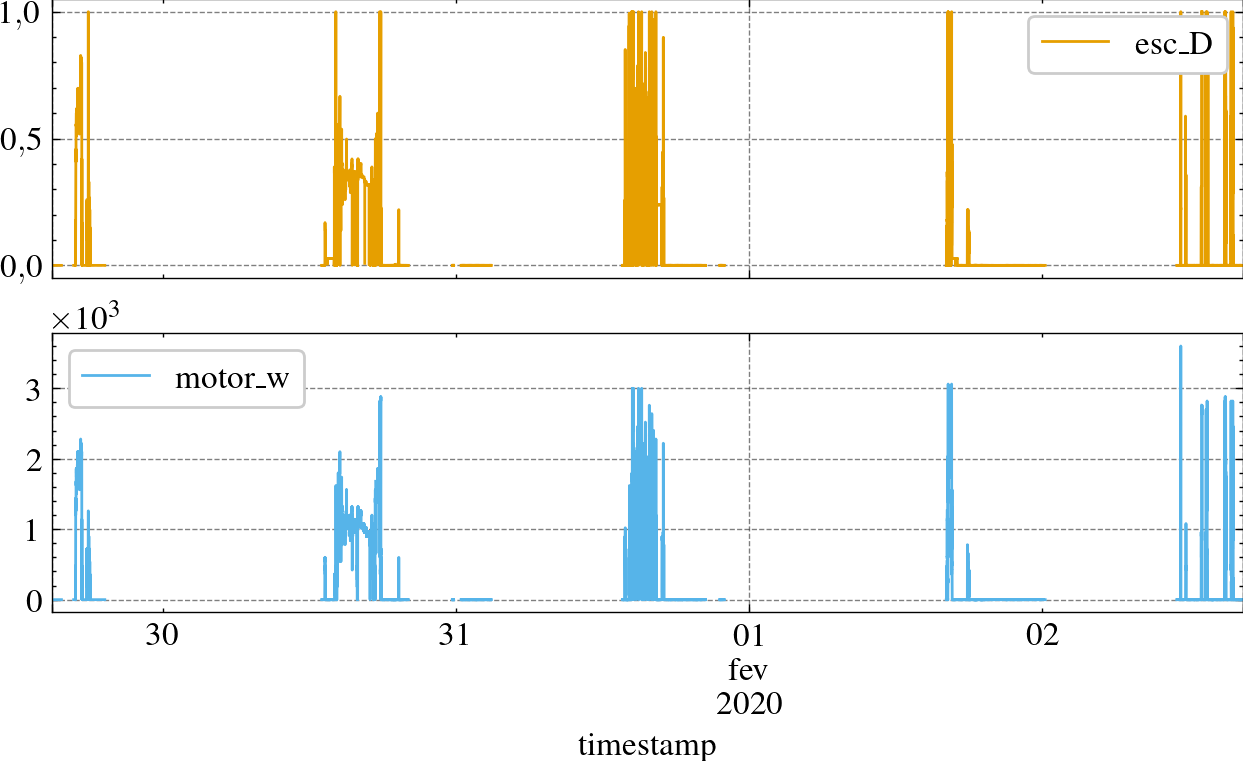

In [42]:
df[['esc_D', 'motor_w']].plot(subplots=True);